## Load data dari database

In [4]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine("sqlite:///../plantation.db")

df = pd.read_sql("SELECT * FROM plantation", engine)

df.head()


,date,region,production_ton,operational_cost,sales_revenue,inventory_stock,profit
0,2024-01-01,Sulawesi,183,7977.0,17231,336,9254
1,2024-01-02,Sumatra,125,5602.0,7009,380,1407
2,2024-01-03,Sulawesi,103,6134.0,7260,458,1126
3,2024-01-04,Sulawesi,193,5522.0,13038,300,7516
4,2024-01-05,Sumatra,111,6268.0,16865,345,10597


## Convert tanggal

In [5]:
df['date'] = pd.to_datetime(df['date'])
df["month"] = df['date'].dt.to_period('M').astype(str)

## Efficiency Metric

In [7]:
df["profit_margin"] = df["profit"] / df["operational_cost"]

## Region paling profitable

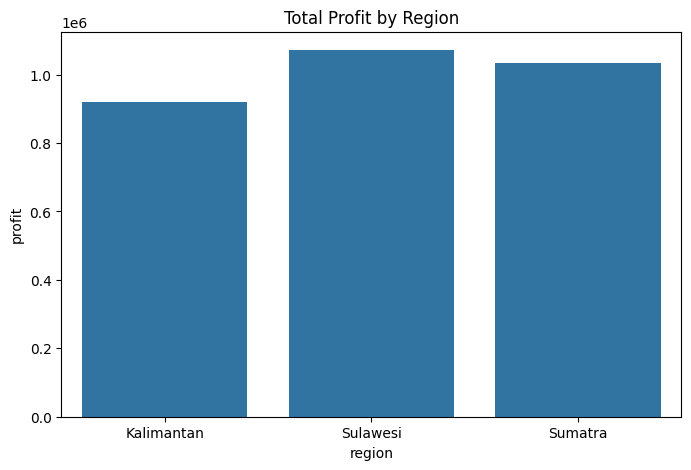

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

region_profit = df.groupby("region")["profit"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=region_profit, x="region", y="profit")
plt.title("Total Profit by Region")
plt.show()

## Trend profit per bulan

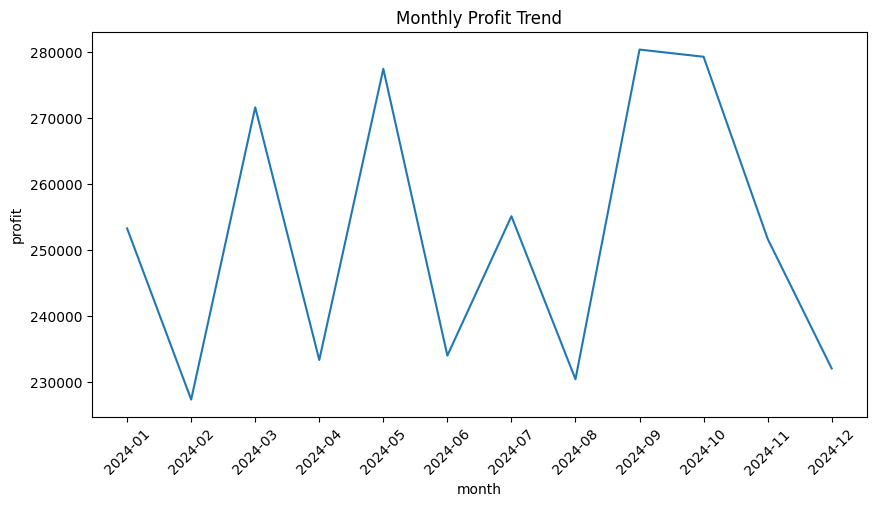

In [9]:
monthly_profit = df.groupby("month")["profit"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_profit, x="month", y="profit")
plt.xticks(rotation=45)
plt.title("Monthly Profit Trend")
plt.show()

## Cost vs Profit Efficiency

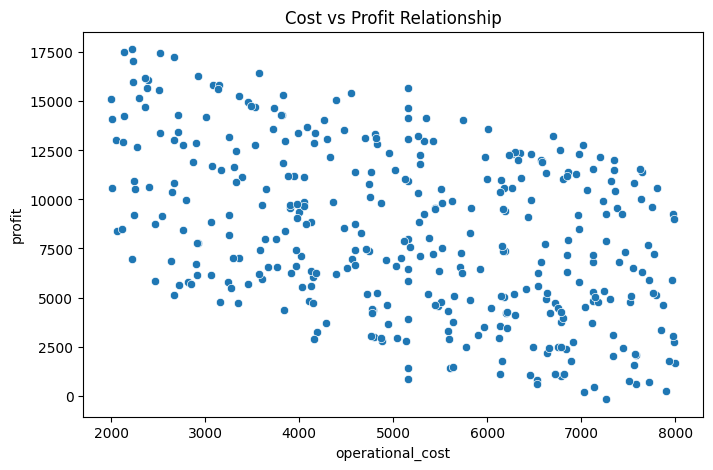

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="operational_cost", y="profit")
plt.title("Cost vs Profit Relationship")
plt.show()

## Production vs Profit

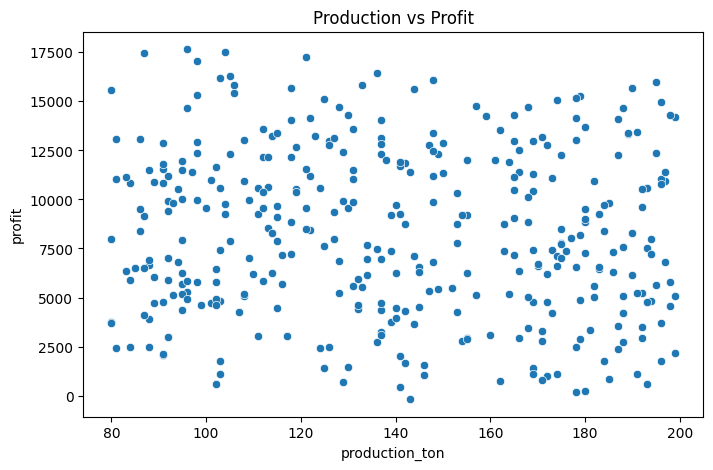

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="production_ton", y="profit")
plt.title("Production vs Profit")
plt.show()


## Inventory Impact

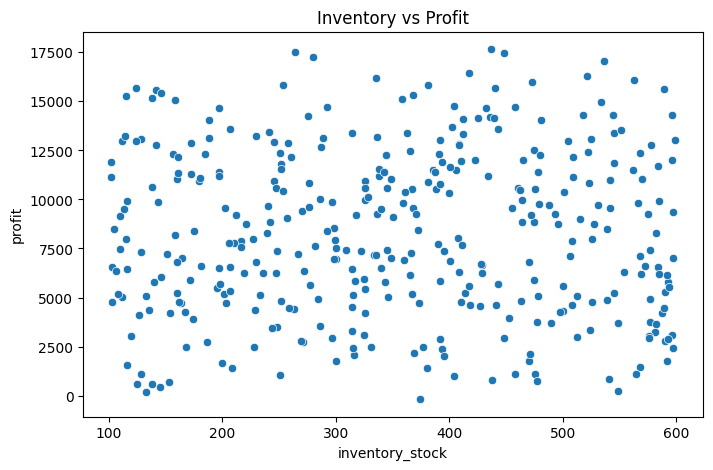

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="inventory_stock", y="profit")
plt.title("Inventory vs Profit")
plt.show()

## Distribution View
*Apakah Profit stabil atau liar?*


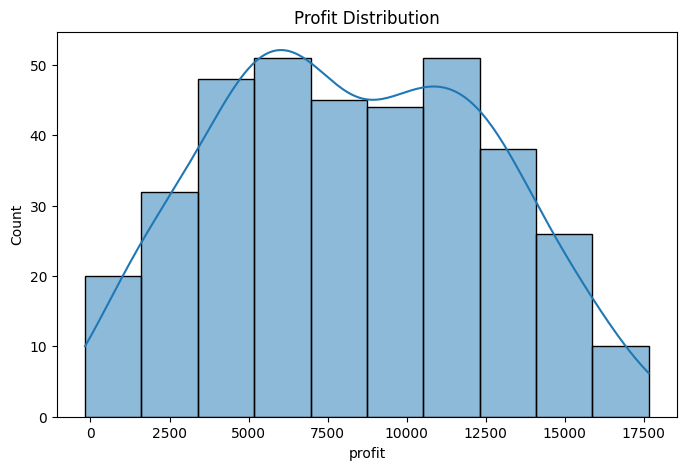

In [16]:
#Hsitogram + KDE
plt.figure(figsize=(8,5))
sns.histplot(df["profit"], kde=True)
plt.title("Profit Distribution")
plt.show()

## Box plor per region
*Region mana paling konsisten*

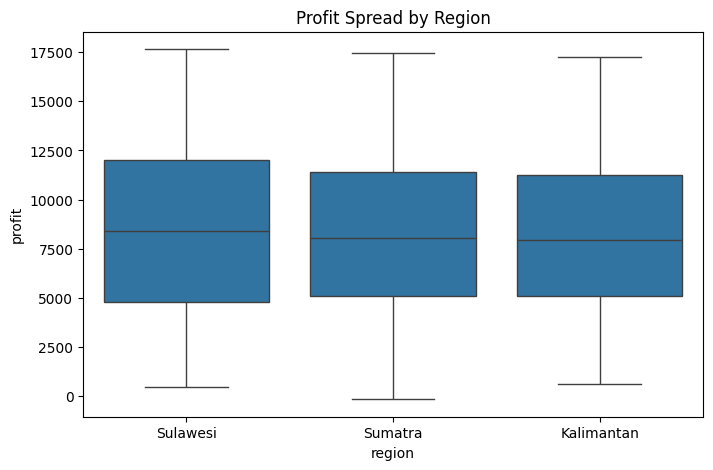

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="region", y="profit")
plt.title("Profit Spread by Region")
plt.show()


## Heatmap Correlation
*Relationship semua varibel*

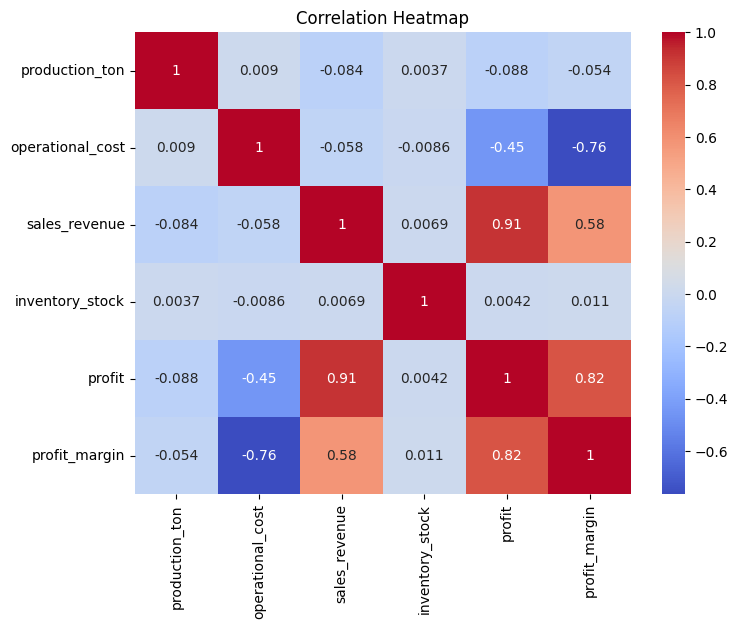

In [18]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Profit Trend per Region
*Siapa naik siapa turun?*

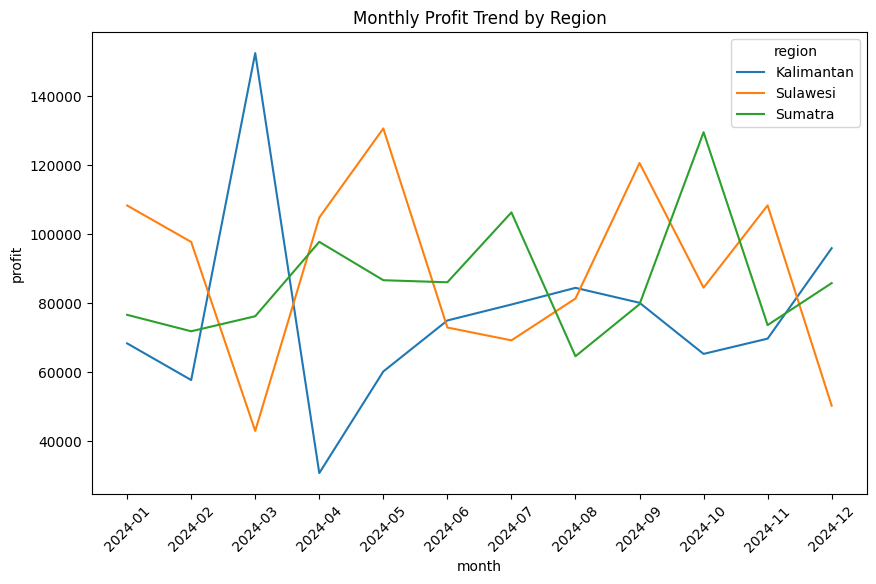

In [ ]:
region_month = df.groupby(["month","region"])["profit"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=region_month, x="month", y="profit", hue="region")
plt.xticks(rotation=45)
plt.title("Monthly Profit Trend by Region")
plt.show()

## Efficiency Plot
*Profit margin insight*

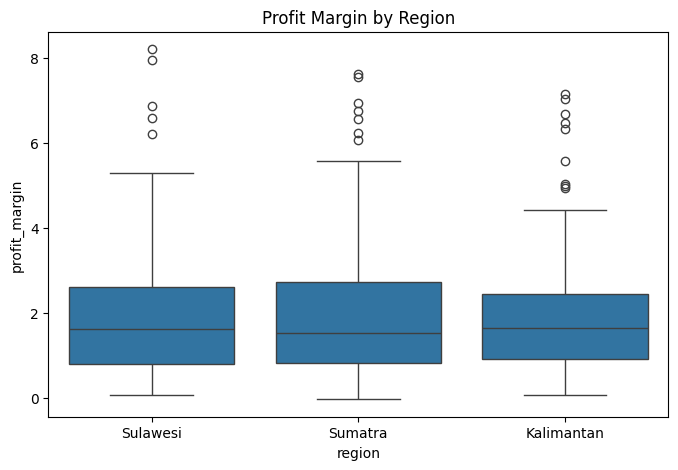

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="region", y="profit_margin")
plt.title("Profit Margin by Region")
plt.show()


## Pairplot(EDA Mode)

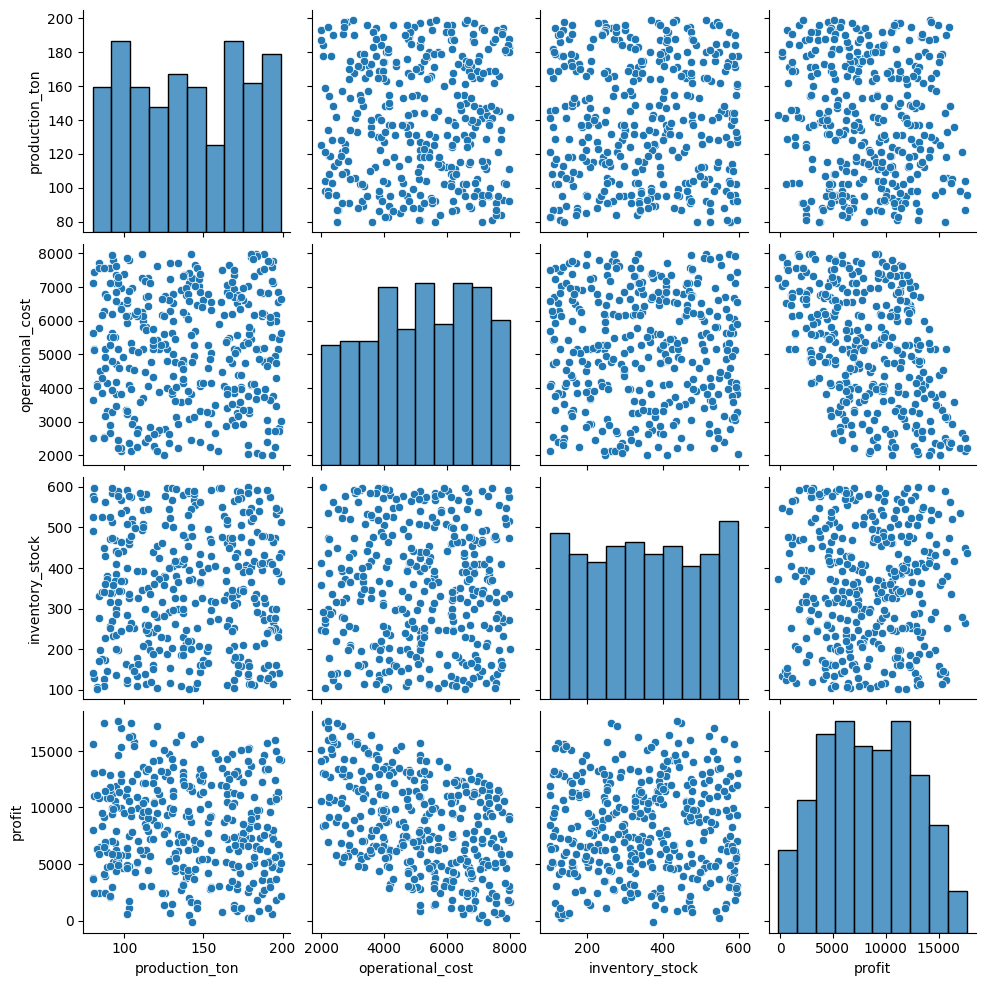

In [22]:
sns.pairplot(df[["production_ton","operational_cost","inventory_stock","profit"]])
plt.show()